In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, LogisticRegression, LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [6]:
hr_df = pd.read_csv(r"C:\Users\dai\Desktop\MachineLearning\Day4\human-resources-analytics\HR_comma_sep.csv")

In [7]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
X = hr_df.drop('left',axis = 1)
y = hr_df['left']


In [9]:
# train test Split

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 24,test_size = 0.3,stratify=y)
# stratify -> after this results should improve if not that's coincidence
print(y_train.value_counts(normalize = True)*100)
print(y_test.value_counts(normalize = True)*100)

left
0    76.209985
1    23.790015
Name: proportion, dtype: float64
left
0    76.216937
1    23.783063
Name: proportion, dtype: float64


In [15]:
#using make_column_selector(dtype_exclude = ) & dtype_include= 
lr = LogisticRegression(multi_class = 'multinomial',random_state =24)
ohe = OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False)
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object) ),(ohe,make_column_selector(dtype_include = object) ),verbose_feature_names_out = False).set_output(transform='pandas')
pipe = Pipeline([('CT',ct),('SCL',None),('LR',lr)])
#ct.fit_transform(hr_df)

In [17]:
pipe.fit(X_train,y_train)
y_pred_prob = pipe.predict_proba(X_test)
p_y_1 = y_pred_prob[:,1]

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
m1spec,sens,thresholds = roc_curve(y_test,p_y_1)

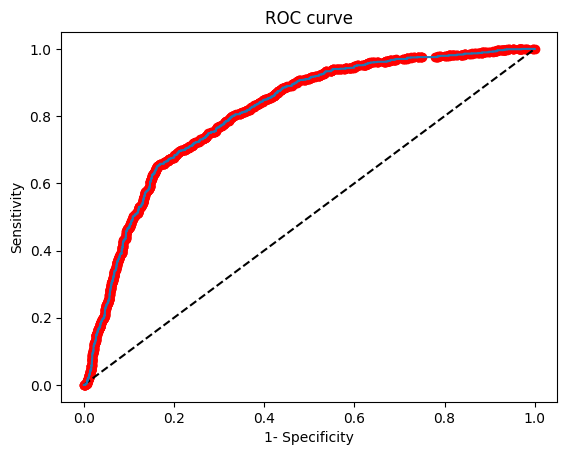

ROC_AUC_Score 0.8100274459462038


In [21]:
plt.plot([0,1],[0,1],'k--')
plt.plot(m1spec,sens)
plt.scatter(m1spec,sens,c='red')
plt.xlabel('1- Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.show()
print("ROC_AUC_Score",roc_auc_score(y_test,p_y_1))